2026/01/05 by Li.jiahao

Before studying the Shor's Algorithm, let's learn two fundamental theories, quantum phase estimation (QPE) and quantum Fourier transform(QFT). Later on, learning the Shor's Algorithm, we will ubderstand  how the QFT accelates the speed of computation.

# 1.Phase estimation procedure

# 1.1 Warm-up: approximating phases with low precision
Recall the Deutsch-Jozsa Algorithm, we get the result through the phase kick-back. Similarly, we will use the technique here.

We define a controlled operator which satisfies $U|\phi \rangle =\lambda |\phi \rangle $, where $\lambda = e^{2\pi i \theta} and 0< \theta <1$. To solve the phase estimation problem, we create a quantum circuit as shown in the following figure.

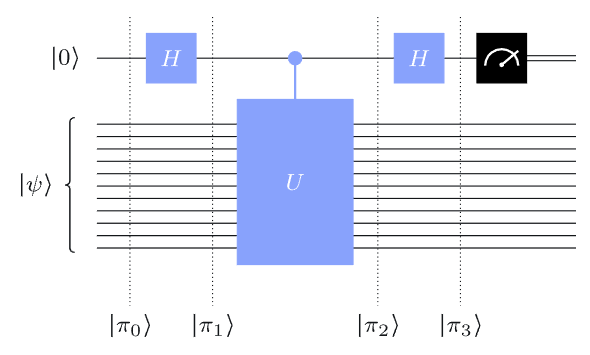

Let's analyze this system, the initial state $|{\pi}_0 \rangle$ is : $$|{\pi}_0 \rangle = |\psi \rangle |0 \rangle$$
And the first H-gate transforms this state to $|{\pi _1} \rangle$: 
$$
| \pi_1 \rangle
= | \psi \rangle | + \rangle
= \frac{1}{\sqrt{2}} | \psi \rangle | 0 \rangle
+ \frac{1}{\sqrt{2}} | \psi \rangle | 1 \rangle
$$
Next, the controlled-U operation is performed, we get state $|{\pi _2} \rangle$: 
$$
| \pi_2 \rangle
= | \psi \rangle | + \rangle
= \frac{1}{\sqrt{2}} | \psi \rangle | 0 \rangle
+ \frac{1}{\sqrt{2}} U| \psi \rangle | 1 \rangle
$$

Using the assumption that $|\psi \rangle $ is the eigenvector of U, state $|{\pi _2} \rangle$ can be written as:
$$
|\pi_2\rangle
= |\psi\rangle \otimes
\frac{1}{\sqrt{2}}\left(|0\rangle + e^{2\pi i \theta}|1\rangle\right)
$$
Finally, after applying the H-gate we get the state $|{\pi _3} \rangle$ :
$$
|\pi_3\rangle
= |\psi\rangle \otimes
\frac{1}{2}\left(
(1 + e^{2\pi i \theta})|0\rangle
+ (1 - e^{2\pi i \theta})|1\rangle
\right)
$$

From the equation, it is clear that if we measure the top qubit, the probability of outcome 1 or 0 is related to the phase $\theta$:
$$p_0 = \left| \frac{1 + e^{2\pi i \theta}}{2} \right|^2 = \cos^2(\pi \theta) \\
p_1 = \left| \frac{1 - e^{2\pi i \theta}}{2} \right|^2 = \sin^2(\pi \theta)$$ 

We can plot both probability functions as follows.

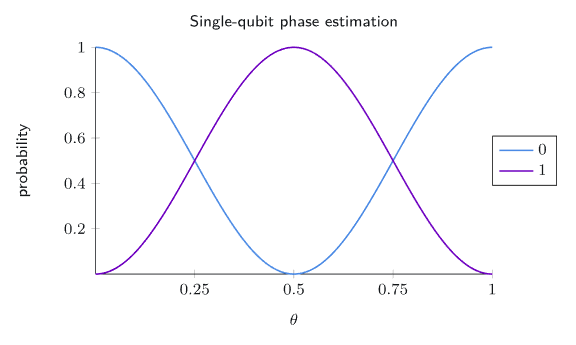

From the probabilities, we can see two special case: 
* 1.If we always measure outcome of 0, which means the $\theta$ is 0. 
* 2.If we always measure outcome of 0, which means the $\theta$ is 0.

However, for any other value of $\theta$, we will get a mix of 0 and 1 outcomes. In this situation, our evaluation is prone to error becuase of two main reasons. First, we can only evaluate by repeating experiment maany times which causes statistical error. Second, we can't distinguish  phase $\theta$ and $1- \theta$, because they produce the same probabilities.In other words, unless $\theta$ is exactly 0 or 1/2, we cannot determine its precise value with 100% certainty using this simple circuit.


## 1.2 Higher precision

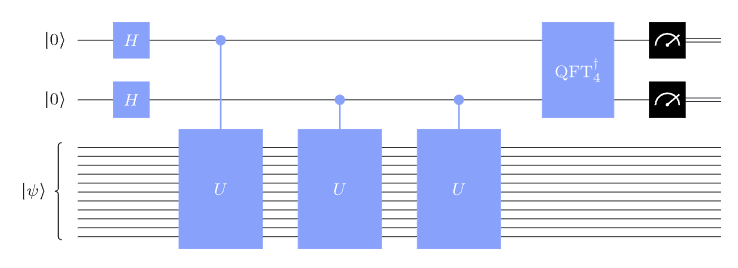

Let's focus on the figure above. Here is the explanation of the circuit: To achieve a higher precision, we introduce a second qubit. Critically, the first qubit controls the U^2 operator. While t he power-of-2 structure is essential for encoding the phase into binary format.The operator controlled by the top qubit, U^2, effectively performs a "bit-shift" on the phase, allowing us to read a more significant bit and thus avoiding the information aliasing we saw in the single-qubit case. This pattern continues, if we introduce the third qubit, it will control the operator $U^{2^{(3-1)} =U^4}$. About the IQFT block, I will introduce it later on.
Let's see the details and explain how the new circuit get higher accuracy.

The initial state can be expressed by $| \pi _1 \rangle$:
$$|\pi_1\rangle = |\psi\rangle \otimes \frac{1}{2} \sum_{a_0=0}^{1} \sum_{a_1=0}^{1} |a_1 a_0\rangle.$$

Similarly, the state $| \pi _2 \rangle$ is:
$$|\pi_2\rangle = |\psi\rangle \otimes \frac{1}{2} \sum_{a_0=0}^{1} \sum_{a_1=0}^{1} e^{2\pi i(a_0)\theta} |a_1 a_0\rangle.$$

Finally,the state $| \pi _3 \rangle$ is:
$$|\pi_3\rangle = |\psi\rangle \otimes \frac{1}{2} \sum_{a_0=0}^{1} \sum_{a_1=0}^{1} e^{2\pi i(2a_1+a_0)\theta} |a_1 a_0\rangle.$$

Using the binary encoding:$x = 2a_1+a_0$, state $| \pi _3 \rangle$ can be written as:
$$|\pi_3\rangle = |\psi\rangle \otimes \frac{1}{2} \sum_{x=0}^{3}  e^{2\pi i x\theta} |x\rangle = |\psi\rangle \otimes |\phi \rangle.$$

Let's consider four special cases, $\theta = 0, 1/4,2/4,3/4$.And we can get the state of the two qubits $|\phi _{4*\theta}\rangle$:
$$
|\phi_0\rangle = \frac{1}{2}|0\rangle + \frac{1}{2}|1\rangle + \frac{1}{2}|2\rangle + \frac{1}{2}|3\rangle \\
|\phi_1\rangle = \frac{1}{2}|0\rangle + \frac{i}{2}|1\rangle - \frac{1}{2}|2\rangle - \frac{i}{2}|3\rangle \\
|\phi_2\rangle = \frac{1}{2}|0\rangle - \frac{1}{2}|1\rangle + \frac{1}{2}|2\rangle - \frac{1}{2}|3\rangle \\
|\phi_3\rangle = \frac{1}{2}|0\rangle - \frac{i}{2}|1\rangle - \frac{1}{2}|2\rangle + \frac{i}{2}|3\rangle
$$
Now, the information of phase is hidden in these states and we need a method to extract it. The method is Inverse Quantum Fourier Transform (IQFT). As we noted, for a single qubit, the IQFT is just an H-gate. Becuase we haven't introduce the QFT in detail yet, I will use a python program to solve it.


设置: 3个量子比特 (N=8), 目标相位 θ = 5/8
期望的最终状态是 |101> (即 |5>)

--- 初始状态向量 |ψ_in> ---


<IPython.core.display.Latex object>


--- 用于演化的操作电路 ---


/tmp/ipykernel_485836/284657850.py:34: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  iqft_gate = QFT(n_qubits, name='IQFT').inverse()


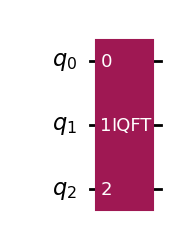


--- IQFT后的最终状态向量 |ψ_out> (通过直接计算得到) ---


<IPython.core.display.Latex object>


--- 为了生成直方图，我们构建一个完整的模拟电路 ---


AerError: 'unknown instruction: IQFT'

In [ ]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.circuit.library import QFT # This import is still correct
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, array_to_latex
from qiskit.quantum_info import Statevector

n_qubits = 3
N = 2**n_qubits
k = 5 #  θ = 5/N


psi_in_vector = np.zeros(N, dtype=complex)
for j in range(N):
    psi_in_vector[j] = (1/np.sqrt(N)) * np.exp(2j * np.pi * k * j / N)

print("--- initial state |ψ_in> ---")
display(array_to_latex(psi_in_vector, prefix="|\\psi_{in}\\rangle = "))

# --- 3. 使用 Statevector.evolve() 直接计算最终状态 ---
# a. 从我们的numpy向量创建一个Statevector对象
initial_sv = Statevector(psi_in_vector)

# b. 创建一个只包含IQFT操作的电路
iqft_circ = QuantumCircuit(n_qubits, name="IQFT Circuit")

# ############################# CHANGE HERE ##################################
# Old way: iqft_circ.append(QFT(num_qubits=n_qubits, inverse=True), range(n_qubits))
# New, correct way: Create a QFT gate, then get its inverse.
iqft_gate = QFT(n_qubits, name='IQFT').inverse()
iqft_circ.append(iqft_gate, range(n_qubits))
# ############################################################################

print("\n--- 用于演化的操作电路 ---")
display(iqft_circ.draw('mpl'))

# c. 使用 .evolve() 方法将IQFT操作应用到我们的初始状态向量上
final_sv = initial_sv.evolve(iqft_circ)

print("\n--- IQFT后的最终状态向量 |ψ_out> (通过直接计算得到) ---")
display(array_to_latex(final_sv, prefix="|\\psi_{out}\\rangle = "))

# --- 4. (可选) 使用模拟器验证测量结果 ---
print("\n--- 为了生成直方图，我们构建一个完整的模拟电路 ---")
full_circuit = QuantumCircuit(n_qubits)
full_circuit.initialize(psi_in_vector, range(n_qubits))
full_circuit.barrier()

# ############################# CHANGE HERE ##################################
# Apply the same change to the full circuit
full_circuit.append(iqft_gate, range(n_qubits))
# ############################################################################

full_circuit.measure_all()

# 使用QASM模拟器来模拟多次运行和测量的结果
qasm_sim = AerSimulator()
shots = 2048
counts = qasm_sim.run(full_circuit, shots=shots).result().get_counts()

print(f"\n--- 模拟测量 {shots} 次后的结果 ---")
display(plot_histogram(counts))